# Сборный проект

## Описание проекта
*В работе нам предоставленны данные интернет-магазина "Стимчик" с информацией об играх, годе выпуска, продажах в разных странах, оценках игроков и критиков, возрастной рейтинг. Нам предстоит изучить эти данные и выявить тенденцию для "успешных игр". Используя этот вывод, мы сможем повысить прибыль интернет-магазина.*
_____
### Данное исследование разделим на несколько частей
#### Часть 1. Изучение общей информации:
* <a href="#1.1">[1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.]</a>
* <a href="#1.2">[2. Нахождение и ликвидация пропусков, ошибок]</a>
* <a href="#1.3">[3. Подготовка данных к анализу]</a>

#### Часть 2. Исследовательский анализ данных:
* <a href="#2.1">[1. Количество выпущенных игр по годам]</a>
* <a href="#2.2">[2. Самые популярные приставки]</a>
* <a href="#2.3">[3. Выделение актуальных данных, анализ лидирующих платформ]</a>
* <a href="#2.4">[4. Выделение самых популярных платформ, график распределения по глобальным продажам игр]</a>
* <a href="#2.5">[5. Анализ влияния отзывов критиков и пользователей]</a>
* <a href="#2.6">[6. Анализ популярных жанров]</a>
* <a href="#2.7">[7. Вывод 2 части]</a>  
  
#### Часть 3. Портрет пользователя каждого региона:
* <a href="#3.1">[1. Cамые популярные платформы]</a>
* <a href="#3.2">[2. Самые популярные жанры]</a>
* <a href="#3.3">[3. Влияние возрастного рейтинга на продажи в регионах]</a>
  
#### Часть 4. Проверка гипотез:
* <a href="#4.1">[1. Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.]</a>
* <a href="#4.2">[2. Средние пользовательские рейтинги жанров Action и Sports разные.]</a>
  
#### Часть 5. Вывод проекта:
* <a href="#5.1">[1. Вывод проекта.]</a>


## Изученеие файлов с данными, получение общей информации, загрузка библиотек.

Загрузим необходимые библиотеки и изучим предоставленные данные <a name="1.1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

In [2]:
data=pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В наших данных нужно будет:
1. Привести названия столбцов к нижнему регистру
2. Убрать пропуски в названии, жанре (2 пропущеных значения, возможно, просто ошибка выгрузки)
3. Убрать пропуски в годе релиза (около 200 значений, возможно, нет информации о дате релиза или ошибка выгрузки)
4. Проанализировать пропуски в рейтинге, возможно, это связано с датой релиза, либо игра прошла мимо рейтингов критиков и игроков 
5. Поменять тип данных в некоторых столбцах
6. По возможности заполнить пропущенные данные

## Нахождение и ликвидация пропусков, ошибок

### Приведем к нижему регистру
Начнем с названия столбцов <a name='1.2'></a>

In [4]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Пропуски в колонках от name до other_sales

Посмотрим строки, где пропущенны названия игр

In [5]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Повезло, эти две строки несут мало информации, да и еще мы нашли 2 строки с пропущенными жанрами. Удалим эти строки 

In [6]:
data.dropna(subset = ['name'],inplace = True)


Удалим строки с пропущенными датами резила, тк это может повлиять на актуальность наших данных, удалим их

In [7]:
data.dropna(subset = ['year_of_release'],inplace = True)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Пропуски в оценках и изменение данных

#### Первичная обработка user_score

Изучим значение tbd в user_score

In [9]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd =To Be Determined, то есть "Будет определено". Видим, что в некоторых столбцах выручки стоят 0. Возможно, в этом регионе игра не выходила, и мнение не было получено. Приравняем эти значения к None 


In [10]:
data.loc[data['user_score']=='tbd','user_score']=None
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Изменение типов данных
Все колонки находятся в подходящий типах данных, кроме года и пользовательского рейтинга. Преобразуем его в int 

In [11]:
data['year_of_release']=data['year_of_release'].astype(int)
data['user_score']=data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Заполнение данных

В большинстве случаев, оценки критиков сходятся с мнением игроков, поэтому можно дополнить значения,приравняв их, если есть хотя бы одно значение

In [12]:
print('Средняя оценка критиков',data['critic_score'].mean()/10)
print('Средняя оценка игроков',data['user_score'].mean())

Средняя оценка критиков 6.899436302142052
Средняя оценка игроков 7.126329894144447


In [13]:
data.loc[data['critic_score'].isna(),'critic_score']=data['user_score']*10
data.loc[data['user_score'].isna(),'user_score']=data['critic_score']/10

Заполним пропущенные значения в возрастном рейтинге модой (самое встречающееся значение) по жанрам. Это наилучший вариант, тк обычно жанры отностятся к определенным возрастным рейтингам. Посмотрим моду для каждого жанра

In [14]:
data_genre=data.groupby('genre')['rating'].apply(lambda x: x.mode().iloc[0])
data_genre=data_genre.reset_index()
for gen in data['genre'].unique():
    data.loc[((data['genre']== gen)&(data['rating'].isna())),'rating']=\
    data_genre.loc[data_genre['genre']==gen,'rating'].values[0]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       8552 non-null float64
user_score         8552 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


## Подготовка данных к анализу
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец. <a name='1.3'></a>

In [16]:
data['total_earnings']=0
name_reg=['na_sales','eu_sales','jp_sales','other_sales']
for i in name_reg:
    data['total_earnings']+=data[i]

In [17]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_earnings
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38


## Исследовательский анализ данных
### Количество выпущенных игр по годам
<a name="2.1"></a>

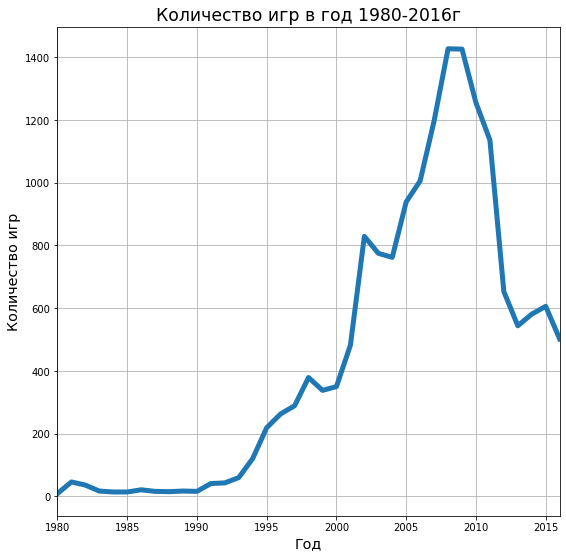

In [18]:
data.groupby('year_of_release')['year_of_release'].count().plot(grid=True,figsize = (9,9),linewidth=5.0);
plt.title('Количество игр в год 1980-2016г',fontsize='xx-large')
plt.xlabel('Год',fontsize='x-large')
plt.ylabel('Количество игр',fontsize='x-large')
plt.show()

Видим, что игровая индустрия начала активно развиваться с 1993 года, поэтому для определения самой популярной платформы будем брать данные после 1993 года. Заметим, что после 2007 года игр стали выпускать меньше. Возможно разработчики начали уделать больше всермени качеству игры, а не количеству выпущенных игр.

### Самые популярные приставки
<a name="2.2"></a>

Найдем самые прибыльные приставки и проанализируем их. Построим графики прибыли каждой платформы за год и прикинем примерное время жизни приставки.

In [19]:
data_top=data.pivot_table(index='platform',values='total_earnings',aggfunc='sum').sort_values('total_earnings',
                                                                                              ascending=False).head(7)
data_new=data.query('platform in @data_top.index and year_of_release >1993')
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_earnings
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [20]:
data_sum=data_new.groupby(['platform','year_of_release'])['total_earnings'].sum()

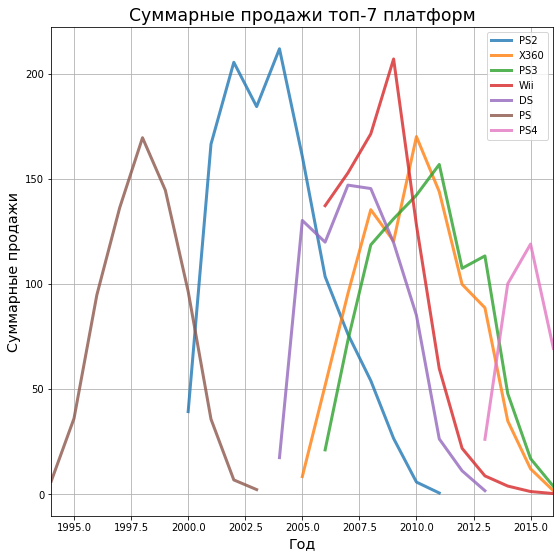

In [21]:
names=data_top.index

for i in names: 
    data_sum[i].plot(grid=True,figsize = (9,9),linewidth=3.0,label=i,alpha=0.8)
    plt.legend()
    plt.title('Суммарные продажи топ-7 платформ',fontsize='xx-large')
    plt.xlabel('Год',fontsize='x-large')
    plt.ylabel('Суммарные продажи',fontsize='x-large')

По данному графику видно, что среднее время жизни приставки около 6-7 лет. Поэтому для анализа возьмем данные за последние 5 лет (уменьшает вероятность, что пратформа исчезнет) 

### Выделение актуальных данных, анализ лидирующих платформ

Возьмем данные с 2012 года<a name="2.3"></a>

In [22]:
data_relevant=data.query('year_of_release>= 2012')
data_relevant=data_relevant.reset_index()
data_relevant = data_relevant.drop(columns='index')
data_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_earnings
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


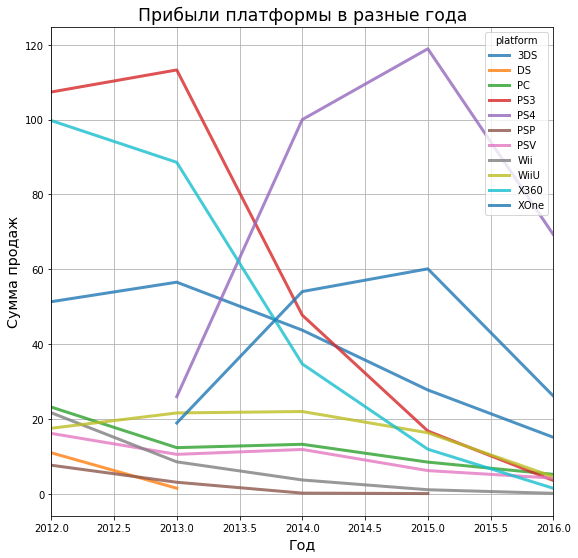

In [23]:
pd.pivot_table(data_relevant,index='year_of_release',columns='platform',values='total_earnings',
        aggfunc='sum').plot(grid=True,figsize = (9,9),linewidth=3.0,label=i,alpha=0.8);
plt.title("Прибыли платформы в разные года",fontsize='xx-large');
plt.xlabel("Год",fontsize='x-large');
plt.ylabel('Сумма продаж',fontsize='x-large');

XboxOne и PS4 являются самыми свежими платформами. Хоть и наблюдается общая тенденция на спад за 2015 год, эти две платформы единственные показывают хороший рост. 3DS достаточно старая притавка и наблюдается ее спад.

### Выделение самых популярных платформ, график распределения по глобальным продажам игр
<a name="2.4"></a>

In [24]:
most_popular_platform=['XOne','PS4']

In [25]:
data_top_platform=data.query('platform in @most_popular_platform')
data_top_platform.reset_index().drop(columns='index')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_earnings
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
634,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
635,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,66.0,6.6,E,0.01
636,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,T,0.01
637,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,T,0.01


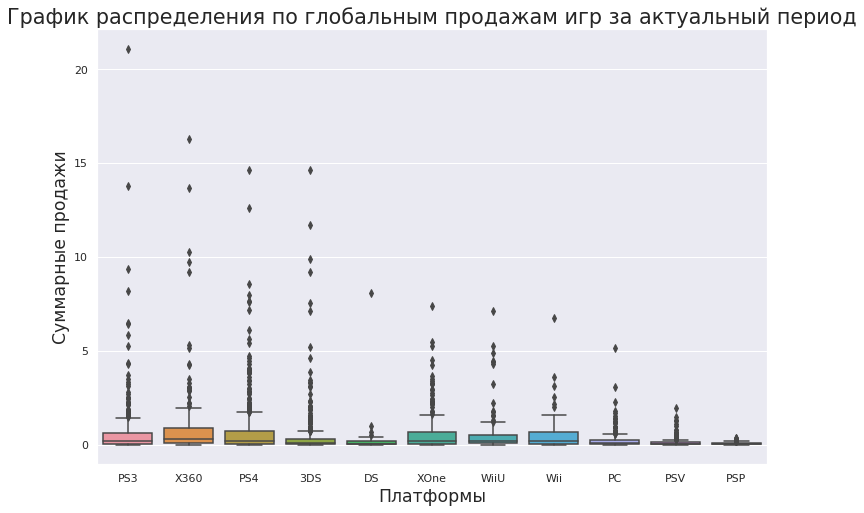

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
g=sns.boxplot(x='platform',y='total_earnings',data=data_relevant);
plt.title('График распределения по глобальным продажам игр за актуальный период',fontsize='xx-large');
plt.xlabel("Платформы",fontsize='x-large');
plt.ylabel('Суммарные продажи',fontsize='x-large');

Как мы видим, разработка игры на актуальной платформе дает вам больше шансов на финансовый успех(На рынке X360 больше денег, чем на DS => больше вероятность покупки вашего товара). Конечно, это не единственный критерий, плохую игру непопулярного жарна никто не купит даже на популярной платформе. Проанализируем отзывы критиков, пользователей, жанры игр

### Анализ влияния отзывов критиков и пользователей
<a name='2.5'></a>

Cоздадим две таблицы с популярными платформами и проанализируем отзывы аудитории для каждой из них

In [27]:
xone=data_top_platform.loc[data_top_platform['platform']==most_popular_platform[0]]
xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_earnings
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,M,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [28]:
ps4=data_top_platform.loc[data_top_platform['platform']==most_popular_platform[1]]
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_earnings
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


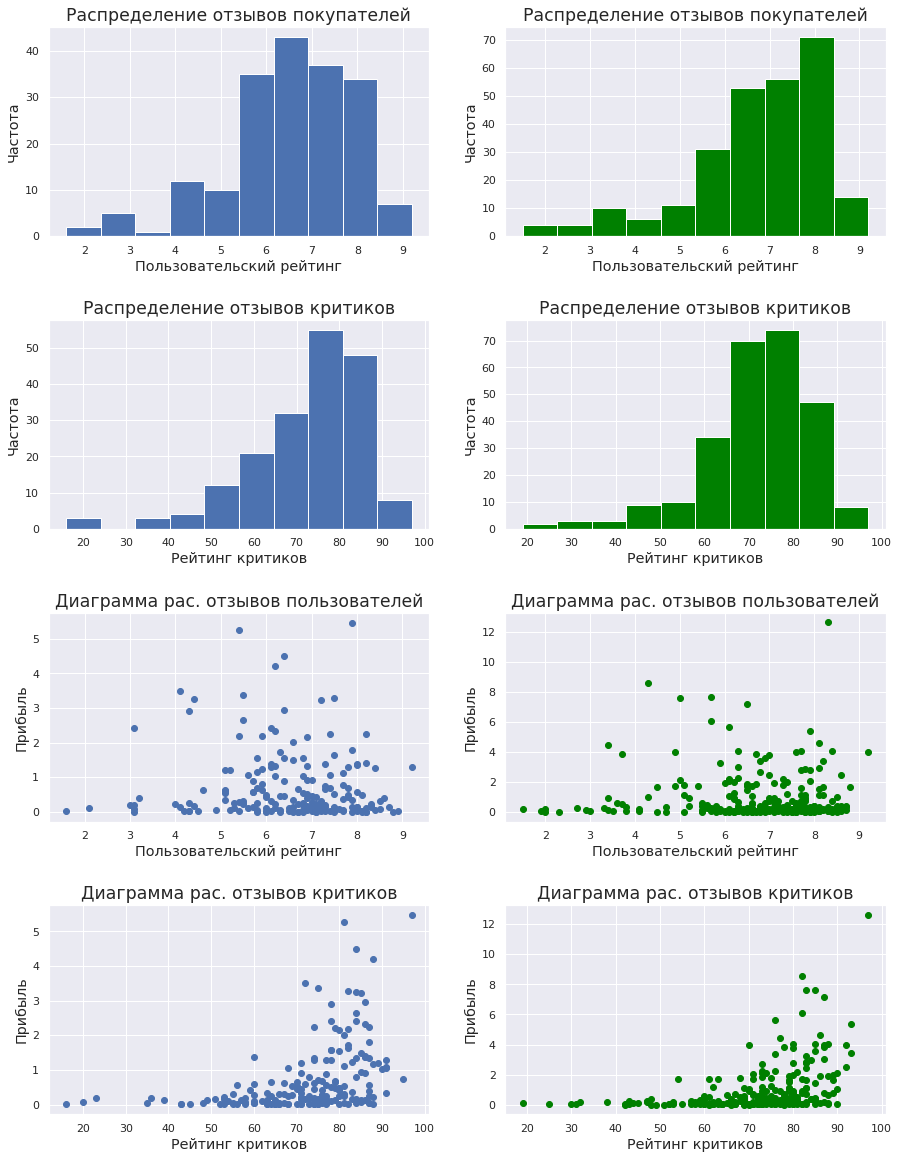

In [29]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
score=['user_score','critic_score']
xlabel=['Пользовательский рейтинг','Рейтинг критиков']
titles=['Распределение отзывов покупателей','Распределение отзывов критиков',
        'Диаграмма рас. отзывов пользователей','Диаграмма рас. отзывов критиков']
l=1
plt.figure(figsize=(15,20))
for k in range(4):
    if k==0:
        plt.subplots_adjust(wspace=0.2, hspace=0.4)
    if k>1:
        plt.subplot(4,2,l) 
        plt.scatter(x=xone[score[k-2]],y=xone['total_earnings'])
        plt.title(titles[k],fontsize='x-large')
        plt.xlabel(xlabel[k-2],fontsize='large')
        plt.ylabel('Прибыль',fontsize='large')
        plt.subplot(4,2,l+1)
        plt.scatter(x=ps4[score[k-2]],y=ps4['total_earnings'],color='green')
        plt.title(titles[k],fontsize='x-large')
        plt.xlabel(xlabel[k-2],fontsize='large')
        plt.ylabel('Прибыль',fontsize='large')
    else:
        plt.subplot(4,2,l)    
        plt.hist(xone[score[k]]) 

        plt.title(titles[k],fontsize='x-large')
        plt.xlabel(xlabel[k],fontsize='large')
        plt.ylabel('Частота',fontsize='large')
        plt.subplot(4,2,l+1)

        plt.hist(ps4[score[k]],color='green')
        plt.title(titles[k],fontsize='x-large')
        plt.xlabel(xlabel[k],fontsize='large')
        plt.ylabel('Частота',fontsize='large')

    l+=2

In [30]:
xone.loc[:,['total_earnings','user_score','critic_score']].corr()

,total_earnings,user_score,critic_score
total_earnings,1.000000,-0.063838,0.407171
user_score,-0.063838,1.000000,0.551951
critic_score,0.407171,0.551951,1.000000


In [31]:
ps4.loc[:,['total_earnings','user_score','critic_score']].corr()

,total_earnings,user_score,critic_score
total_earnings,1.000000,-0.032459,0.400903
user_score,-0.032459,1.000000,0.574627
critic_score,0.400903,0.574627,1.000000


По полученным результатам сложно судить о высокой корреляции между прибылью и отзывами. Однако корреляция 0.4 позволяет судить нам, что небольшая зависимость все таки наблюдается. Некоторые пользователи доверяют мнению критиков и покупают игру, особенно если рейтинг высокий. Так же видно, что зависимости между прибылью и пользовательским мнением не наблюдается. Эти утверждения верны как для XOne, так и для PS4

### Анализ популярных жанров
<a name='2.6'></a>

Изучим количество игр и прибыль каждого жанра

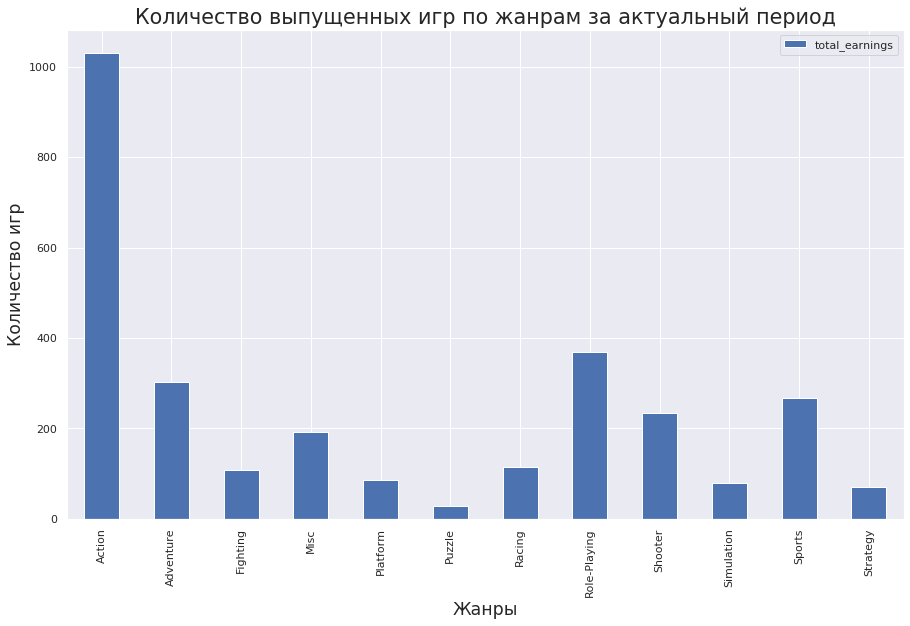

In [32]:
df=data_relevant.pivot_table(index= 'genre', values = 'total_earnings', aggfunc = 'count')
df.plot(kind='bar',figsize=(15,9));
plt.title('Количество выпущенных игр по жанрам за актуальный период',fontsize='xx-large');
plt.xlabel("Жанры",fontsize='x-large');
plt.ylabel('Количество игр',fontsize='x-large');

In [33]:
b=df.sort_values('total_earnings',ascending=False).head(5).index
b

Index(['Action', 'Role-Playing', 'Adventure', 'Sports', 'Shooter'], dtype='object', name='genre')

Самые распространенные жанры: 'Action', 'Role-Playing', 'Adventure', 'Sports', 'Shooter'

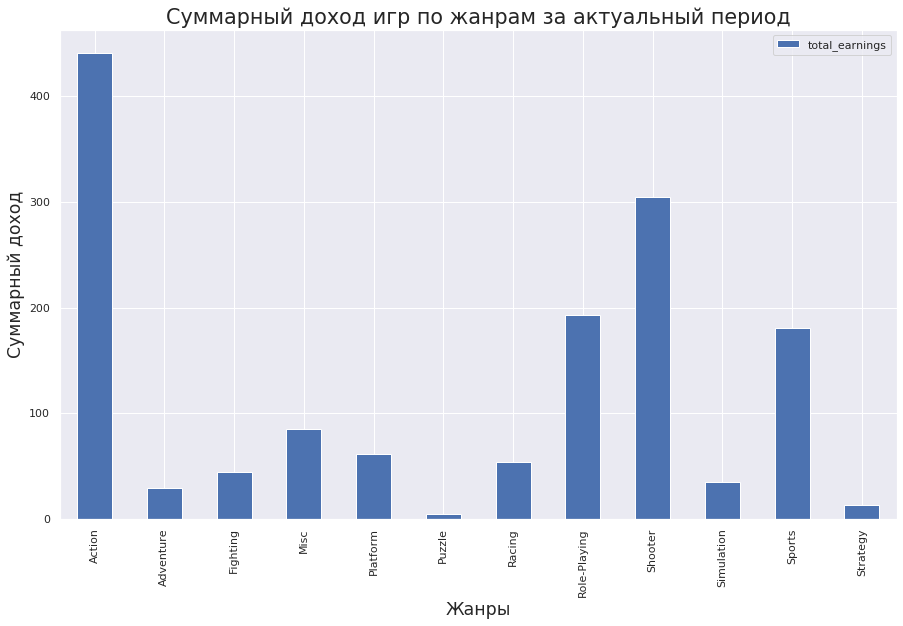

In [34]:
df=data_relevant.pivot_table(index= 'genre', values = 'total_earnings', aggfunc = 'sum')
df.plot(kind='bar',figsize=(15,9));
plt.title('Суммарный доход игр по жанрам за актуальный период',fontsize='xx-large');
plt.xlabel("Жанры",fontsize='x-large');
plt.ylabel('Суммарный доход',fontsize='x-large');

In [35]:
b=df.sort_values('total_earnings',ascending=False).head(5).index
b

Index(['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc'], dtype='object', name='genre')

Самые прибыльные жанры: 'Action', 'Shooter', 'Role-Playing', 'Sports'. Музыку не будем учитывать, она почти в 2 раза меньше 4 места (Спорта) 

Конечно, мы уже выяснили самые прибыльные жарны, однако посмотрим ради интереса медианные значение для каждого жанра

In [36]:
df=data_relevant.pivot_table(index= 'genre', values = 'total_earnings', aggfunc = ['count','sum','median'])

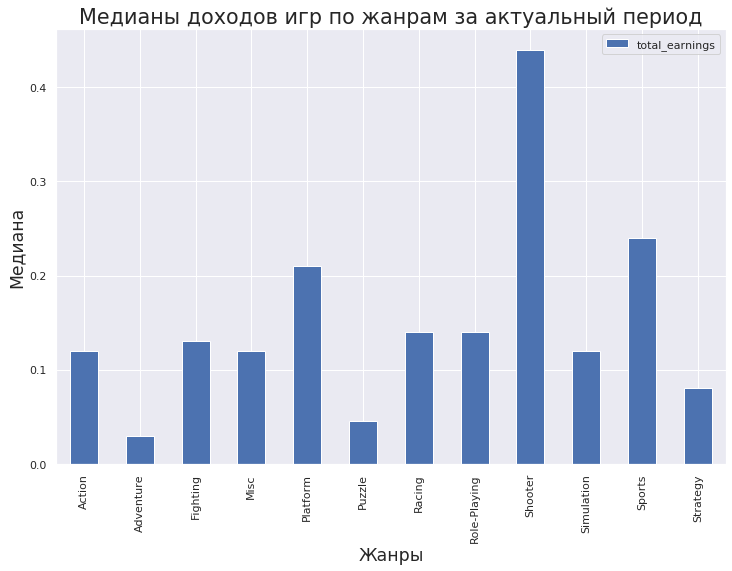

In [37]:
df['median'].plot(kind='bar');
plt.title('Медианы доходов игр по жанрам за актуальный период',fontsize='xx-large');
plt.xlabel("Жанры",fontsize='x-large');
plt.ylabel('Медиана',fontsize='x-large');

Непобедимый жанр 'Action' на этом графике уже не выглядит так грозно. Получается, что если у нас "средненькая" игра, то стоит делать ставку на шутеры, спорт, платформеры.

В этой части мы разобрали жанры, выяснили, что при хороших оценках следует делать ставку на жанры:'Action', 'Shooter', 'Role-Playing', 'Sports', причем первые два являются сильно приоритетными.

### Вывод 2 части
<a name='2.7'></a>
Мы выявили среднее время жизни платформы (примерно 7 лет), изучили актуальный срок и выявили из этих данных самые потенциальные платформы: XOne и PS4. Посмотрели корреляцию между доходами и отзывами, приняли решение, что для выявления прибыльной игры стоит учитывать отзывы критиков. Изучили общее распределение игр по жанрам и выявили самые прибыльные из них: 'Action', 'Shooter', 'Role-Playing', 'Sports'

## Составим портрет пользователя каждого региона
<a name="3.1"></a>

### Cамые популярные платформы
Проанализируем самые популярные платформы для каждого региона

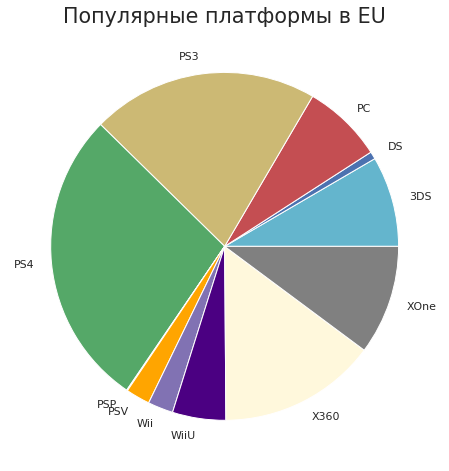

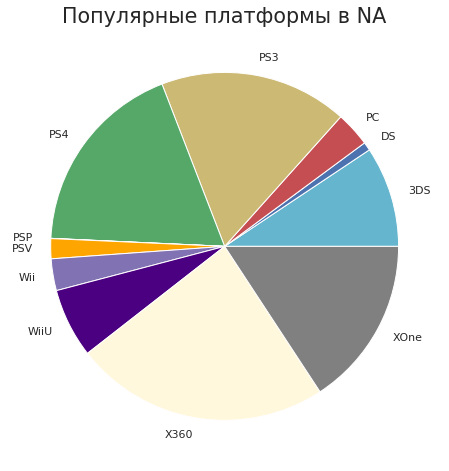

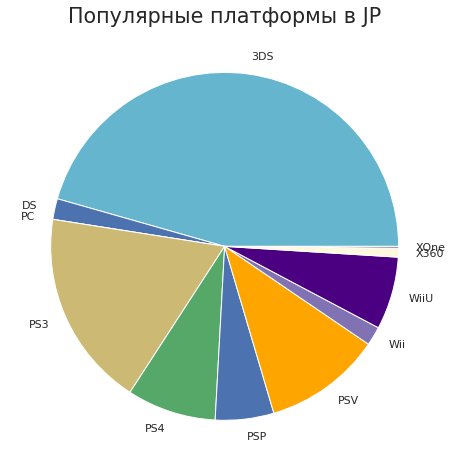

In [38]:
regions=['eu_sales','na_sales','jp_sales']
colors = ["c", 'b','r','y','g','b','orange','m','indigo','cornsilk','grey','white']
titles=['Популярные платформы в EU','Популярные платформы в NA','Популярные платформы в JP']
liders=[]
i=0
for region in regions:
    data_region=data_relevant.pivot_table(index='platform',values=region,aggfunc='sum')
    indexes=data_region.index
    data_region.reset_index
    summ=data_relevant[region].sum()

    data_region['percentage']=data_region[region]/summ
    liders.append(data_region.sort_values('percentage',ascending=False).head(5))    
    plt.pie(data_region['percentage'],colors=colors, labels=indexes)
    plt.title(titles[i],fontsize='xx-large')
    plt.show()
    i+=1

In [39]:
liders[0],liders[1],liders[2]

(          eu_sales  percentage
 platform                      
 PS4         141.09    0.278383
 PS3         106.86    0.210844
 X360         74.52    0.147034
 XOne         51.59    0.101792
 3DS          42.64    0.084132,
           na_sales  percentage
 platform                      
 X360        140.05    0.236983
 PS4         108.74    0.184003
 PS3         103.38    0.174933
 XOne         93.12    0.157571
 3DS          55.31    0.093592,
           jp_sales  percentage
 platform                      
 3DS          87.79    0.455862
 PS3          35.29    0.183249
 PSV          21.04    0.109253
 PS4          15.96    0.082875
 WiiU         13.01    0.067556)

Как мы видим, предпочтения Европы и Северной Америки сильно похожи, однако у Японии почти все по-другому. Японцы поддерживают своего производителя Sony и игнорируют продукцию Microsoft

### Самые популярные жанры
<a name="3.2"></a>
Проделаем аналогичные действия для жанров, однако, в этот раз жанры, которые не входят в топ-5 отнесем к группе others, чтобы разгрузить графики. 

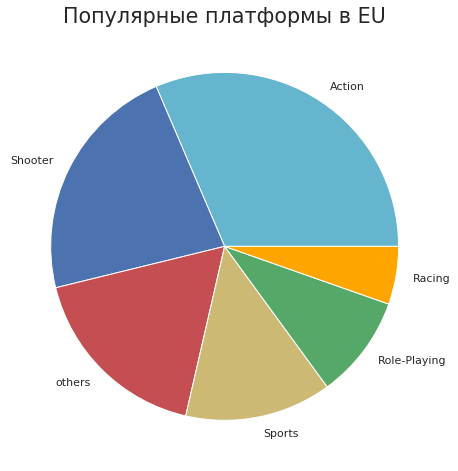

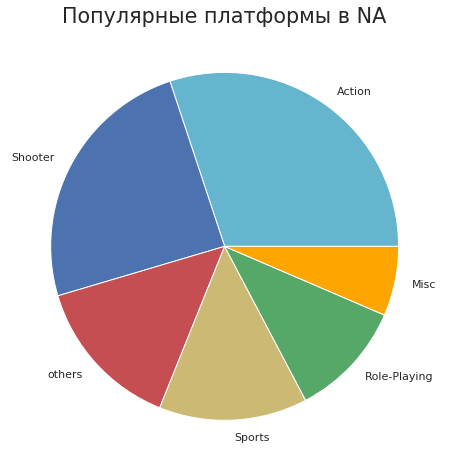

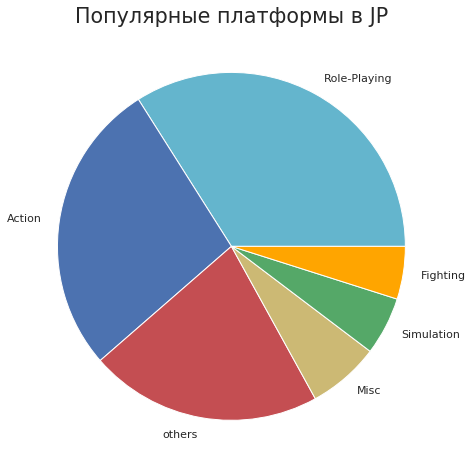

In [40]:
regions=['eu_sales','na_sales','jp_sales']
colors = ["c", 'b','r','y','g','orange']
titles=['Популярные платформы в EU','Популярные платформы в NA','Популярные платформы в JP']
liders=[]
i=0
for region in regions:
    data_region=data_relevant.pivot_table(index='genre',values=region,aggfunc='sum')
    data_region=data_region.sort_values(region,ascending=False)
    indexes=data_region.head(5).index
    data_region=data_region.reset_index()

    data_region.loc[~(data_region['genre'].isin(indexes)),'genre']='others'
    data_region=data_region.pivot_table(index='genre',values=region,aggfunc='sum').sort_values(region,
                                                                                              ascending=False)
    indexes=data_region.index
    summ=data_relevant[region].sum()

    data_region['percentage']=data_region[region]/summ
    liders.append(data_region.sort_values('percentage',ascending=False).head(6))    
    plt.pie(data_region['percentage'],colors=colors, labels=indexes)
    plt.title(titles[i],fontsize='xx-large')
    plt.show()
    i+=1

In [41]:
liders[0],liders[1],liders[2]

(              eu_sales  percentage
 genre                             
 Action          159.34    0.314392
 Shooter         113.47    0.223886
 others           89.10    0.175802
 Sports           69.09    0.136321
 Role-Playing     48.53    0.095754
 Racing           27.29    0.053846,
               na_sales  percentage
 genre                             
 Action          177.84    0.300929
 Shooter         144.77    0.244970
 others           84.64    0.143222
 Sports           81.53    0.137960
 Role-Playing     64.00    0.108297
 Misc             38.19    0.064623,
               jp_sales  percentage
 genre                             
 Role-Playing     65.44    0.339807
 Action           52.80    0.274172
 others           41.63    0.216170
 Misc             12.86    0.066777
 Simulation       10.41    0.054055
 Fighting          9.44    0.049019)

И опять европейцы солидарны со своими американскими коллегами. У японцев опять свои предпочтения,но хотя бы в жанре Action весь мир согласен.

### Влияние возрастного рейтинга на продажи в регионах
<a name="3.3"></a>

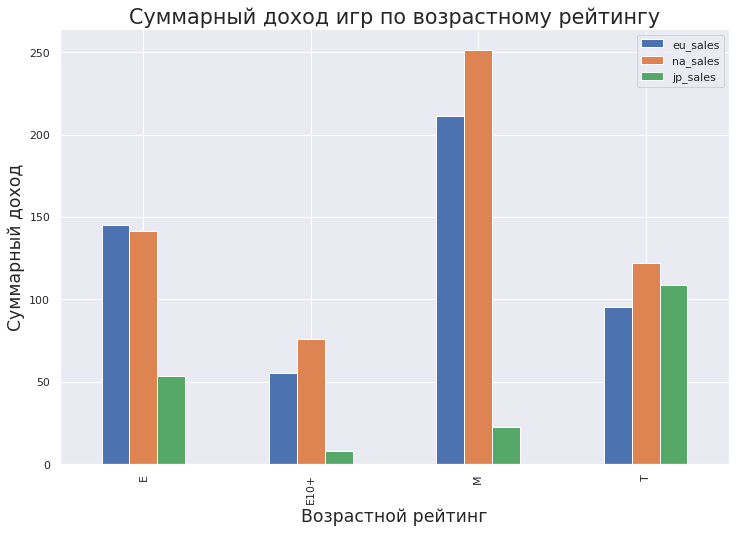

In [42]:
regions=['eu_sales','na_sales','jp_sales']
data_rg=[]
for region in regions:
    data_rg.append(data_relevant.pivot_table(index='rating',values=region,aggfunc='sum'))


data_rating1=data_rg[0].merge(data_rg[1],on='rating')
data_rating1=data_rating1.merge(data_rg[2],on='rating')
data_rating1.plot(kind='bar');
plt.title('Суммарный доход игр по возрастному рейтингу',fontsize='xx-large');
plt.xlabel("Возрастной рейтинг",fontsize='x-large');
plt.ylabel('Суммарный доход',fontsize='x-large');

Европа с Америкой и тут совпадают. Самый частый рейтинг M, потом E. У японцев же сначала рейтинг T, потом уже E

### Вывод 3 части
По популярным платформам, по популярным жанрам, по возрастным рейтингам Европа и Северная Америка очень похожи. Они очень любят Экшн и Шутеры с возрастным рейтингом M. В Японии все обстоит иначе: лидирующий рейтинг T, любимый жанр RP, самая популярная платформа 3DS, любые Xbox отсутствуют в топе.

## Проверим гипотезы

Гипотезы:  
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Для подтверждения или опровержения наших гипотез будет использовать t-test. Он используется, когда нужно понять, является ли разница между выборками случайной или реальной 

### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
<a name="4.1"></a>

Составим нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
**Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные;** 

Составим две таблицы: XOne и PC.

In [43]:
data_xone=data_relevant[(data_relevant['platform']=='XOne')&(data_relevant['user_score'].notna())]
data_pc=data_relevant[(data_relevant['platform']=='PC')&(data_relevant['user_score'].notna())]

alpha = .05
print('Дисперсия XOne:',data_xone['user_score'].var())
print('Дисперсия PC:',data_pc['user_score'].var())
print('Среднее XOne:',data_xone['user_score'].mean())
print('Среднее PC:',data_pc['user_score'].mean())
results = st.ttest_ind(
    data_xone['user_score'], 
    data_pc['user_score'],equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия XOne: 1.8890217959895377
Дисперсия PC: 2.7576614605318697
Среднее XOne: 6.512903225806452
Среднее PC: 6.430434782608695
p-значение: 0.5907361767479966
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средний рейтинг платформ неодинаков, с вероятностью почти в 60%, такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами. Нулевую гипотезу точно не стоит отвергать. Делаем вывод, что   
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action и Sports разные.;
<a name="4.2"></a>
Составим нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые;  
**Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные;** 

Составим две таблицы: Action и Sports.

In [44]:
data_action=data_relevant[(data_relevant['genre']=='Action')&(data_relevant['user_score'].notna())]
data_sports=data_relevant[(data_relevant['genre']=='Sports')&(data_relevant['user_score'].notna())]

alpha = .05
print('Дисперсия Action:',data_action['user_score'].var())
print('Дисперсия Sports:',data_sports['user_score'].var())
results = st.ttest_ind(
    data_action['user_score'], 
    data_sports['user_score'],equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия Action: 1.8924959415877232
Дисперсия Sports: 3.0105195276079977
p-значение: 1.8174388269289055e-20
Отвергаем нулевую гипотезу


Мы получили слишком маленькое значние p-value, что означает, что пользовательские рейтинги жанров Action и Sports различны. Альтернативная гипотеза верна

## Вывод проекта <a name="5.1"></a>

В первой части мы привели названия столбцов к нижнему регистру, поменяли типы данных, заполнили пропуски в рейтинге и отзывах пользователей с критиками, добавили столбец с прибылью по миру

In [45]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_earnings
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38


Во второй части мы выявили самые популярные платформы и их среднее время жизни. По этим данным мы выявили актуальный период, на который мы в дальнейшем и ориентировались. Получили самые популярные платформы: XOne, PS4. Рассчитали корреляцию между продажами и отзывами- мнению критиков можно доверять, но не только в них дело. Выявили самые популярные жанры: 'Action', 'Shooter', 'Role-Playing', 'Sports'
* <a href="#2.2">[Самые популярные приставки]</a>
* <a href="#2.3">[Выделение актуальных данных, анализ лидирующих платформ]</a>
* <a href="#2.4">[Выделение самых популярных платформ, график распределения по глобальным продажам игр]</a>
* <a href="#2.5">[Анализ влияния отзывов критиков и пользователей]</a>
* <a href="#2.6">[Анализ популярных жанров]</a>

В третей части мы составили портрет пользователя каждого региона и выяснили, что предпочтения Европы и Америки похожи по всем параметрам, однака Япония отличается достаточно сильно
* <a href="#3.1">[ Cамые популярные платформы]</a>
* <a href="#3.2">[ Самые популярные жанры]</a>
* <a href="#3.3">[ Влияние возрастного рейтинга на продажи в регионах]</a>

В четвертой части мы проверили следующие гипотезы:  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Выяснили что средние пользовательские рейтинги платформ Xbox One и PC одинаковые; что пользовательские рейтинги жанров Action и Sports различны.

### Рекомендации по основной бизнес-задаче
По проделанной работе могу посоветовать магазину следить за  жанрами Action и Shooter с хорошими отзывами критиков, которые выйдут на PS4 и XOne. Следует ориентироваться на европейский и американский рынок, так как в Японии самый популярный жанр RP, который в остальных регионах хоть и находится в топ-5, сильно проигрывает Action и Shooter